<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW2/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Template written by Federica B. Bianco @fedhere
UDel DSPS \\
 Completed by Christian Munley

In [3]:
from IPython.display import HTML, display
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi2 distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Number of Molecules')

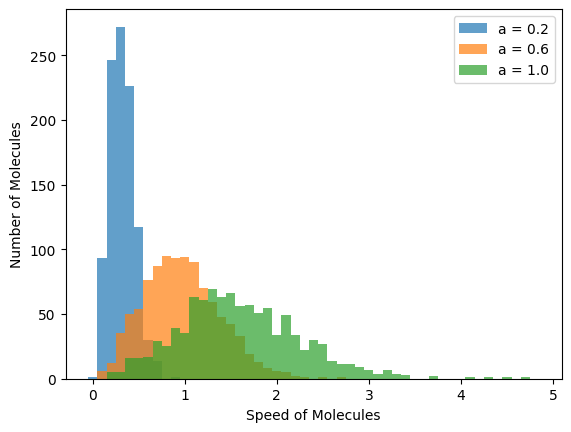

In [4]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);

pl.legend();
ax.set_xlabel('Speed of Molecules')
ax.set_ylabel('Number of Molecules')

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


**Answer:** **$a \propto \sqrt{T}$**


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?

**The means calculated from sampling the distribution are slighly lower than the theoretical means calculated above. In this example, N=1000, as N->Infinity, the difference in means will dissapear. The most probably molecular speed is not the mean, but rather the mode, or the value that appears most frequently. For continuous distribution, this is the peak of the distribution. The chi-squared distribution is skewed to the right, so thhe most probably molecular speed is lower than the mean molecular speed.**


In [5]:
nu = 3

# Mean before scale
base_mean = (2**0.5) * sp.special.gamma((nu + 1) / 2) / sp.special.gamma(nu / 2)

# Scale
means = [base_mean * a for a in [0.2, 0.6, 1.0]]

print(f"Calculated means: {means}")
empirical_means = [sp.stats.chi.rvs(df=3, scale=a, size=1000).mean() for a in [0.2, 0.6, 1.0]]
print(f"Empirical means: {empirical_means}")


Calculated means: [0.31915382432114625, 0.9574614729634385, 1.595769121605731]
Empirical means: [0.3204055163616212, 0.9451519906510517, 1.5859960918241227]


This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


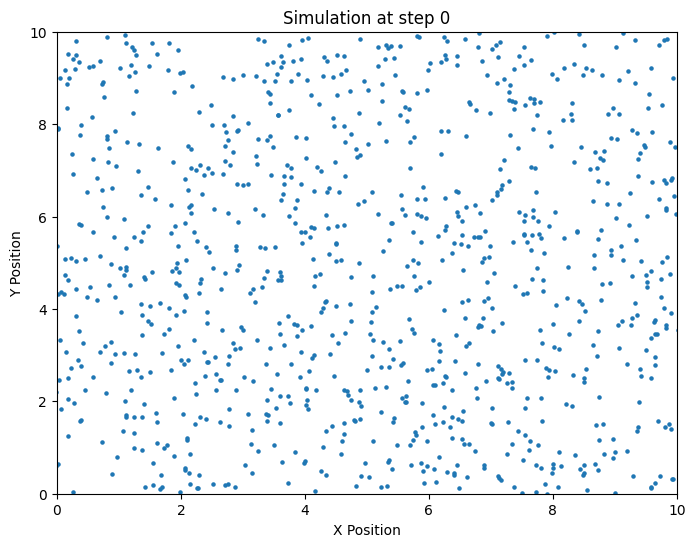

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Initialization
N = 1000
box_size = 10

positions = box_size * np.random.rand(N, 2)

mean_speed = 1.0
std_dev = 0.2
speeds = np.random.normal(mean_speed, std_dev, N)
directions = 2 * np.pi * np.random.rand(N)

num_steps = 100
dt = 0.1

# Function to update positions for animation
def update(num):
    global positions, directions, speeds
    positions[:, 0] += speeds * np.cos(directions) * dt
    positions[:, 1] += speeds * np.sin(directions) * dt

    hit_wall_x = np.logical_or(positions[:, 0] < 0, positions[:, 0] > box_size)
    directions[hit_wall_x] = np.pi - directions[hit_wall_x]

    hit_wall_y = np.logical_or(positions[:, 1] < 0, positions[:, 1] > box_size)
    directions[hit_wall_y] = -directions[hit_wall_y]

    # Update scatter plot
    ax.clear()
    ax.scatter(positions[:, 0], positions[:, 1], s=5)
    ax.set_xlim(0, box_size)
    ax.set_ylim(0, box_size)
    ax.set_title(f"Simulation at step {num}")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")

# Create scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positions[:, 0], positions[:, 1], s=5)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
ax.set_title("Simulation at step 0")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

# Animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, repeat=False)
display(HTML(ani.to_jshtml()))
